In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color, img_as_float
# img_as_float переводит имзображение в численное представление
# https://chat.openai.com/share/79755115-6b91-416e-ab70-b069c432674a


from IPython.display import display, Image
# для показывания изображения
# пример использования display(Image('gray_mandrill.png')) 
import cv2

In [2]:
# Функции normalize_image, norm_columns и norm_rows не используются в этой тетрадкке, но на всякий случай не будем удалять

# Function to normalize an image
# в результате работы функции все значения ячейки матрицы распологаются от 0 до 1
# функция работает изображением, которое оно тоже воспринимает как матрицу
# функция делает нормализованные монохромные изображения (то есть двумерные массивы) 
# если мы делаем нормализованные трехмерные массивы для цветных изображений, то каждый слой надо нормализовать отдельно
# https://chat.openai.com/share/276a3f57-28a9-45b8-902a-8ddcc7053f4e 

def normalize_image(im):   
    im_res = im - np.min(im)
    return (1 / np.max(im_res)) * im_res


# Function to normalize columns

# функция norm_columns в коде ниже не используется
# тут функция от функции, а потом делим каждый элемент на сумму элементов в строке

def norm_columns(f, x):
    return f(x) / np.sum(f(x), axis=0)

# Function to normalize rows
# в отличии 
def norm_rows(f, x):
    return f(x) / np.sum(f(x), axis=1)[:, np.newaxis]

# See https://chat.openai.com/share/d01e5b68-f1f5-403a-9976-1203ad4cd65c 
# for further explanation
# про массивы с ChatGPT https://chat.openai.com/share/403fcfae-85d5-411a-a7f4-363ab0228dcf 

In [3]:
mandrill = io.imread("https://raw.githubusercontent.com/JuliaImages/TestImages.jl/images/images/mandrill.tiff")
mandrill_float = img_as_float(mandrill)
# то есть mandrill_float это уже матрица, где ячейки - это десятичные дроби от 0,00 до 1,00
mandrill.shape
mandrill_float.shape
mandrill.dtype

dtype('uint8')

Для изучения изображений нам не нужно использовать функцию `save_show`  В библиотеке `matplotlib` есть готовая команда `imshow`.
Она отрисовывает как изображения в формате `unit8`, так и нормализованные изображения

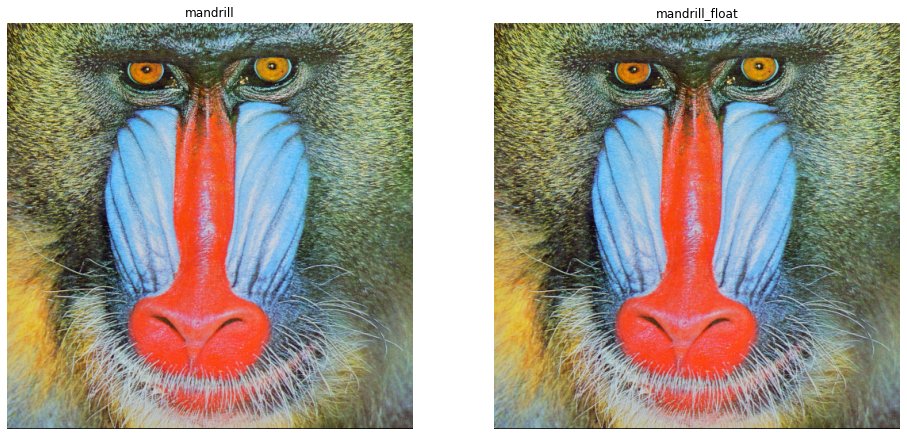

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Отображение первого изображения
axes[0].imshow(mandrill)
axes[0].axis('off')  # Отключение отображения осей для первого изображения
axes[0].set_title('mandrill')

# Отображение второго изображения
axes[1].imshow(mandrill_float)
axes[1].axis('off')  # Отключение отображения осей для второго изображения
axes[1].set_title('mandrill_float')

# Отображение фигуры с подграфиками
plt.show()

In [5]:
def julia_monochrome(rgb_image):
    coeffs = np.array([0.299, 0.587, 0.114], dtype=rgb_image.dtype)
    return rgb_image @ coeffs

 # coeffs = np.array([0.2125, 0.7154, 0.0721], dtype=rgb.dtype) - this is Python standard

минимальное значение в ячейке массива mandrill =  0 , максимальное значение в ячейке =  255

После использования функции julia_monochrome:

минимальное значение в ячейке массива julia_monochrome(mandrill) становится =  0 , максимальное значение в ячейке =  0


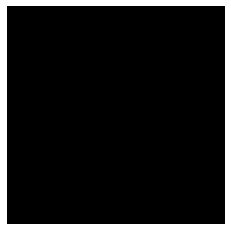

In [6]:
# но если мы обрабатываем с помощью julia_monochrome изначальное изображение mandrill
# со значениями в ячейках от 0 до 255, происходит обнуление масива
print('минимальное значение в ячейке массива mandrill = ', np.min(mandrill), 
      ', максимальное значение в ячейке = ', np.max(mandrill))
test = julia_monochrome(mandrill)
print()
print("\033[1m" + "После использования функции julia_monochrome:" + "\033[0m")
print()

print('минимальное значение в ячейке массива julia_monochrome(mandrill) становится = ', np.min(test), 
      ', максимальное значение в ячейке = ', np.max(test))

# соответсвенно картинка становится черным квадратом ;-)

plt.imshow(test, cmap='gray') # если не ставить cmap='gray', то получается что-то сине-желтое
plt.axis('off')  # Отключение отображения осей
plt.show()

Если переводить в формат float до функции julia_monochrome
минимальное значение в ячейке массива становится =  0.0 , максимальное значение в ячейке =  230.54299999999998

Если применять функцию julia_monochrome уже к нормальзованному файлу
минимальное значение в ячейке массива становится =  0.0 , максимальное значение в ячейке =  0.9040901960784312


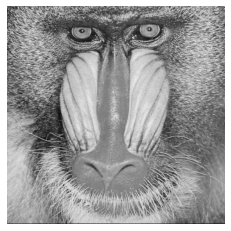

In [7]:
# если перед использованием функции julia_monochrome поменять тип ячеек на float 
# то все нормально
mandrill_to_float = mandrill.astype(float) 
m_test_float = julia_monochrome(mandrill_to_float)


print("\033[1m" + 'Если переводить в формат float до функции julia_monochrome' + "\033[0m") 
print('минимальное значение в ячейке массива становится = ', 
      np.min(m_test_float), ', максимальное значение в ячейке = ', np.max(m_test_float))
print()

m = julia_monochrome(mandrill_float)

print("\033[1m" +'Если применять функцию julia_monochrome уже к нормальзованному файлу' + "\033[0m") 
print('минимальное значение в ячейке массива становится = ', 
      np.min(m), ', максимальное значение в ячейке = ', np.max(m))

# соответсвенно, если julia_monochrome применяется после перевода формата во float, все нормально отрисоаввается

plt.imshow(julia_monochrome(mandrill.astype(float)), cmap = 'gray') 
           # если не ставить cmap='gray', то получается что-то сине-желтое
plt.axis('off')  # Отключение отображения осей
plt.show()

**Итого**:

Функция `julia_monochrome` работает с трёхмерным массивом, у которого последнее измерение имеет размер 3 и переводит его в двумерный с помощью линейного преобразования. 

Реально используется для перевода цветного изображения в черно-белое.  

[обсуждение возможностей функции julia_monochrome с ChatGPT](https://chat.openai.com/share/2be730c2-f49f-4fa0-8197-ece29060ea48)

Функция работает только с теми трехмерными массивами, у которых ячейки числа в формате float. Иначе получается массив только из нулевых элементов. 

Это происходит потому, что если числа исходного массива имеют формат uint8, то строчка в функции coeffs = np.array([0.299, 0.587, 0.114], dtype=rgb_image.dtype) создает нулевой вектор. Потому что при пренобразовании в формат unit8 все дробные части теряются. А умножение на нулевой вектор дает нулевую матрицу.

[Обсуждение проблемы применения функции julia_monochrome к матрицам с другими форматами ячеек](https://chat.openai.com/share/51671a2e-9a73-48bb-8ed7-fdf411210817)



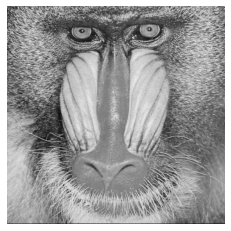

In [8]:
# с нормализованным файлом функция julia_monochrome тоже работает правильно им все отрисовывается

plt.imshow(m, cmap='gray') # если не ставить cmap='gray', то получается что-то сине-желтое
plt.axis('off')  # Отключение отображения осей
plt.show()


После использования функции julia_monochrome_1:

минимальное значение в ячейке массива julia_monochrome_1(mandrill) становится =  0.0 , максимальное значение в ячейке =  230.54299999999998


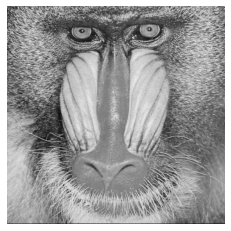

И при использовании julia_monochrome_1 картинка нормально отображается


In [9]:
# поскольку мне не нравится, что нужно проводить дополнительные операции, то я модернизировала функцию
def julia_monochrome_1(rgb_image):
    coeffs = np.array([0.299, 0.587, 0.114]) #!!! Не переводим элементы вектора в формат unit8
    return rgb_image @ coeffs

# не понимаю, зачем  в строчке coeffs = np.array([0.299, 0.587, 0.114], dtype=rgb_image.dtype) 
#dtype=rgb_image.dtype. Только портит. Обсудить с Мишкой
# coeffs = np.array([0.2125, 0.7154, 0.0721], dtype=rgb.dtype) - this is Python standard

test_1 = julia_monochrome_1(mandrill)
print()
print("\033[1m" + "После использования функции julia_monochrome_1:" + "\033[0m")
print()

print('минимальное значение в ячейке массива julia_monochrome_1(mandrill) становится = ', np.min(test_1), 
      ', максимальное значение в ячейке = ', np.max(test_1))


plt.imshow(test_1, cmap='gray') # если не ставить cmap='gray', то получается что-то сине-желтое
plt.axis('off')  # Отключение отображения осей
plt.show()

print('И при использовании julia_monochrome_1 картинка нормально отображается')


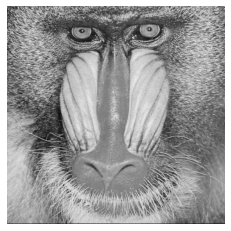

In [10]:
# посмотрим, как работает julia_monochrome_1 с нормализованным файлом img_as_float(mandrill)
test_1_n = julia_monochrome_1(img_as_float(mandrill))

plt.imshow(test_1_n, cmap='gray') # если не ставить cmap='gray', то получается что-то сине-желтое
plt.axis('off')  # Отключение отображения осей
plt.show()

**Вывод:**

Функция `julia_monochrome_1`, где в команде команде `coeffs = np.array([0.299, 0.587, 0.114], dtype=rgb_image.dtype)` убрали  `dtype=rgb_image.dtype` и теперь там `coeffs = np.array([0.299, 0.587, 0.114])` правильно работает
- и для исходного файла mandrill, который создан с помощью io.imread от url картинки
- и для нормализованного файла img_as_float(mandrill)